In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files #Librería para cargar ficheros directamente en Colab
%matplotlib inline

In [ ]:
#necesitaremos mostrar su disco usando los siguientes comandos:
#para obtener mas informacion sobre el montaje, puede consultar: https//stackoverflow.com
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#navegamos has el directorio my driver para alamcenar el conjunto de datos y herramientas
%cd /content/drive/My Drive/dataSet/Healthcare AI Datasets/Brain_MRI

/content/drive/My Drive/dataSet/Healthcare AI Datasets/Brain_MRI


In [ ]:
# Datos que contienen la ruta a Brain MRI y su mascara
brain_df = pd.read_csv('data_mask.csv')

In [ ]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [ ]:
brain_df.head(50)

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
5,TCGA_CS_5395_19981004,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1_...,0
6,TCGA_CS_5395_19981004,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1_...,0
7,TCGA_CS_5395_19981004,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1_...,0
8,TCGA_CS_5395_19981004,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1.tif,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1_...,0
9,TCGA_CS_5395_19981004,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1_...,0


In [ ]:
brain_df.mask_path[1] #ruta a la imagen de la MRI

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [ ]:
brain_df.image_path[1] #ruta a la mascara de segmento

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

   Estado  Cantidad
0       0      2556
1       1      1373


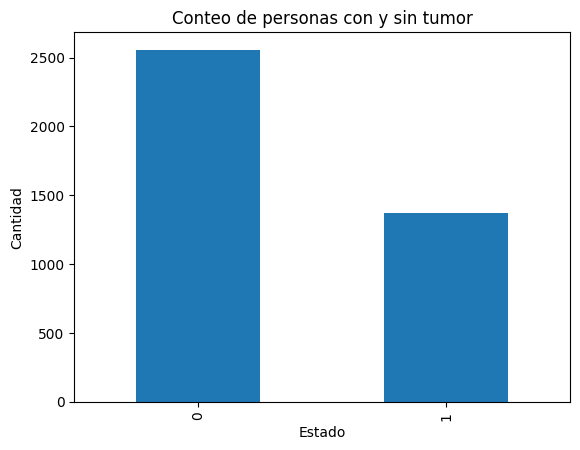

In [ ]:
# Cargar el DataFrame desde el archivo CSV
brain_df = pd.read_csv('data_mask.csv')

# Contar cuántos tienen tumor y cuántos no
tumor_counts = brain_df['mask'].value_counts()

# Convertir la serie en un DataFrame
tumor_counts_df = tumor_counts.to_frame().reset_index()

# Renombrar las columnas
tumor_counts_df.columns = ['Estado', 'Cantidad']

# Imprimir los resultados
print(tumor_counts_df)

# Generar un gráfico de barras
tumor_counts_df.plot(x='Estado', y='Cantidad', kind='bar', legend=False)
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.title('Conteo de personas con y sin tumor')
plt.show()

VISUALIZACION DE DATOS

In [ ]:
brain_df

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
...,...,...,...,...
3924,TCGA_DU_6401_19831001,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,0
3925,TCGA_DU_6401_19831001,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...,0
3926,TCGA_DU_6401_19831001,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,0
3927,TCGA_DU_6401_19831001,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...,0


In [ ]:
brain_df['mask'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [ ]:
#usaremos plotly para hacer un diagrama de barras iterativo
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

In [ ]:
brain_df.mask_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: mask_path, Length: 3929, dtype: object

In [ ]:
brain_df.image_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: image_path, Length: 3929, dtype: object

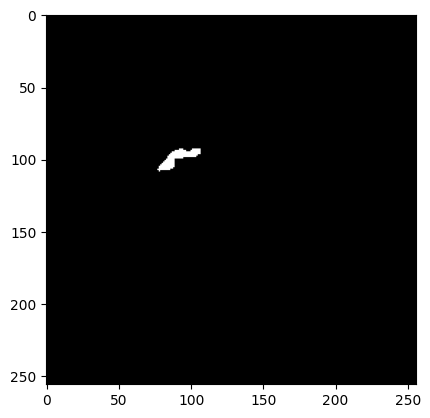

In [ ]:
plt.imshow(cv2.imread(brain_df.mask_path[623]))

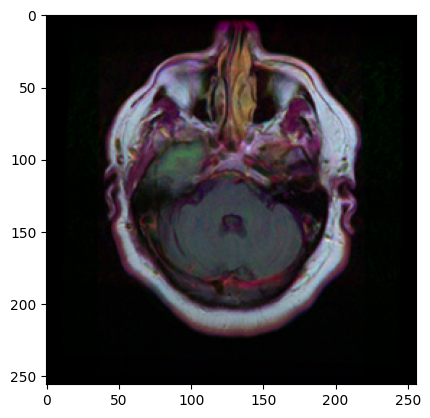

In [ ]:
plt.imshow(cv2.imread(brain_df.image_path[623]))

In [ ]:
cv2.imread(brain_df.mask_path[623]).max()

255

In [ ]:
cv2.imread(brain_df.mask_path[623]).min()

0

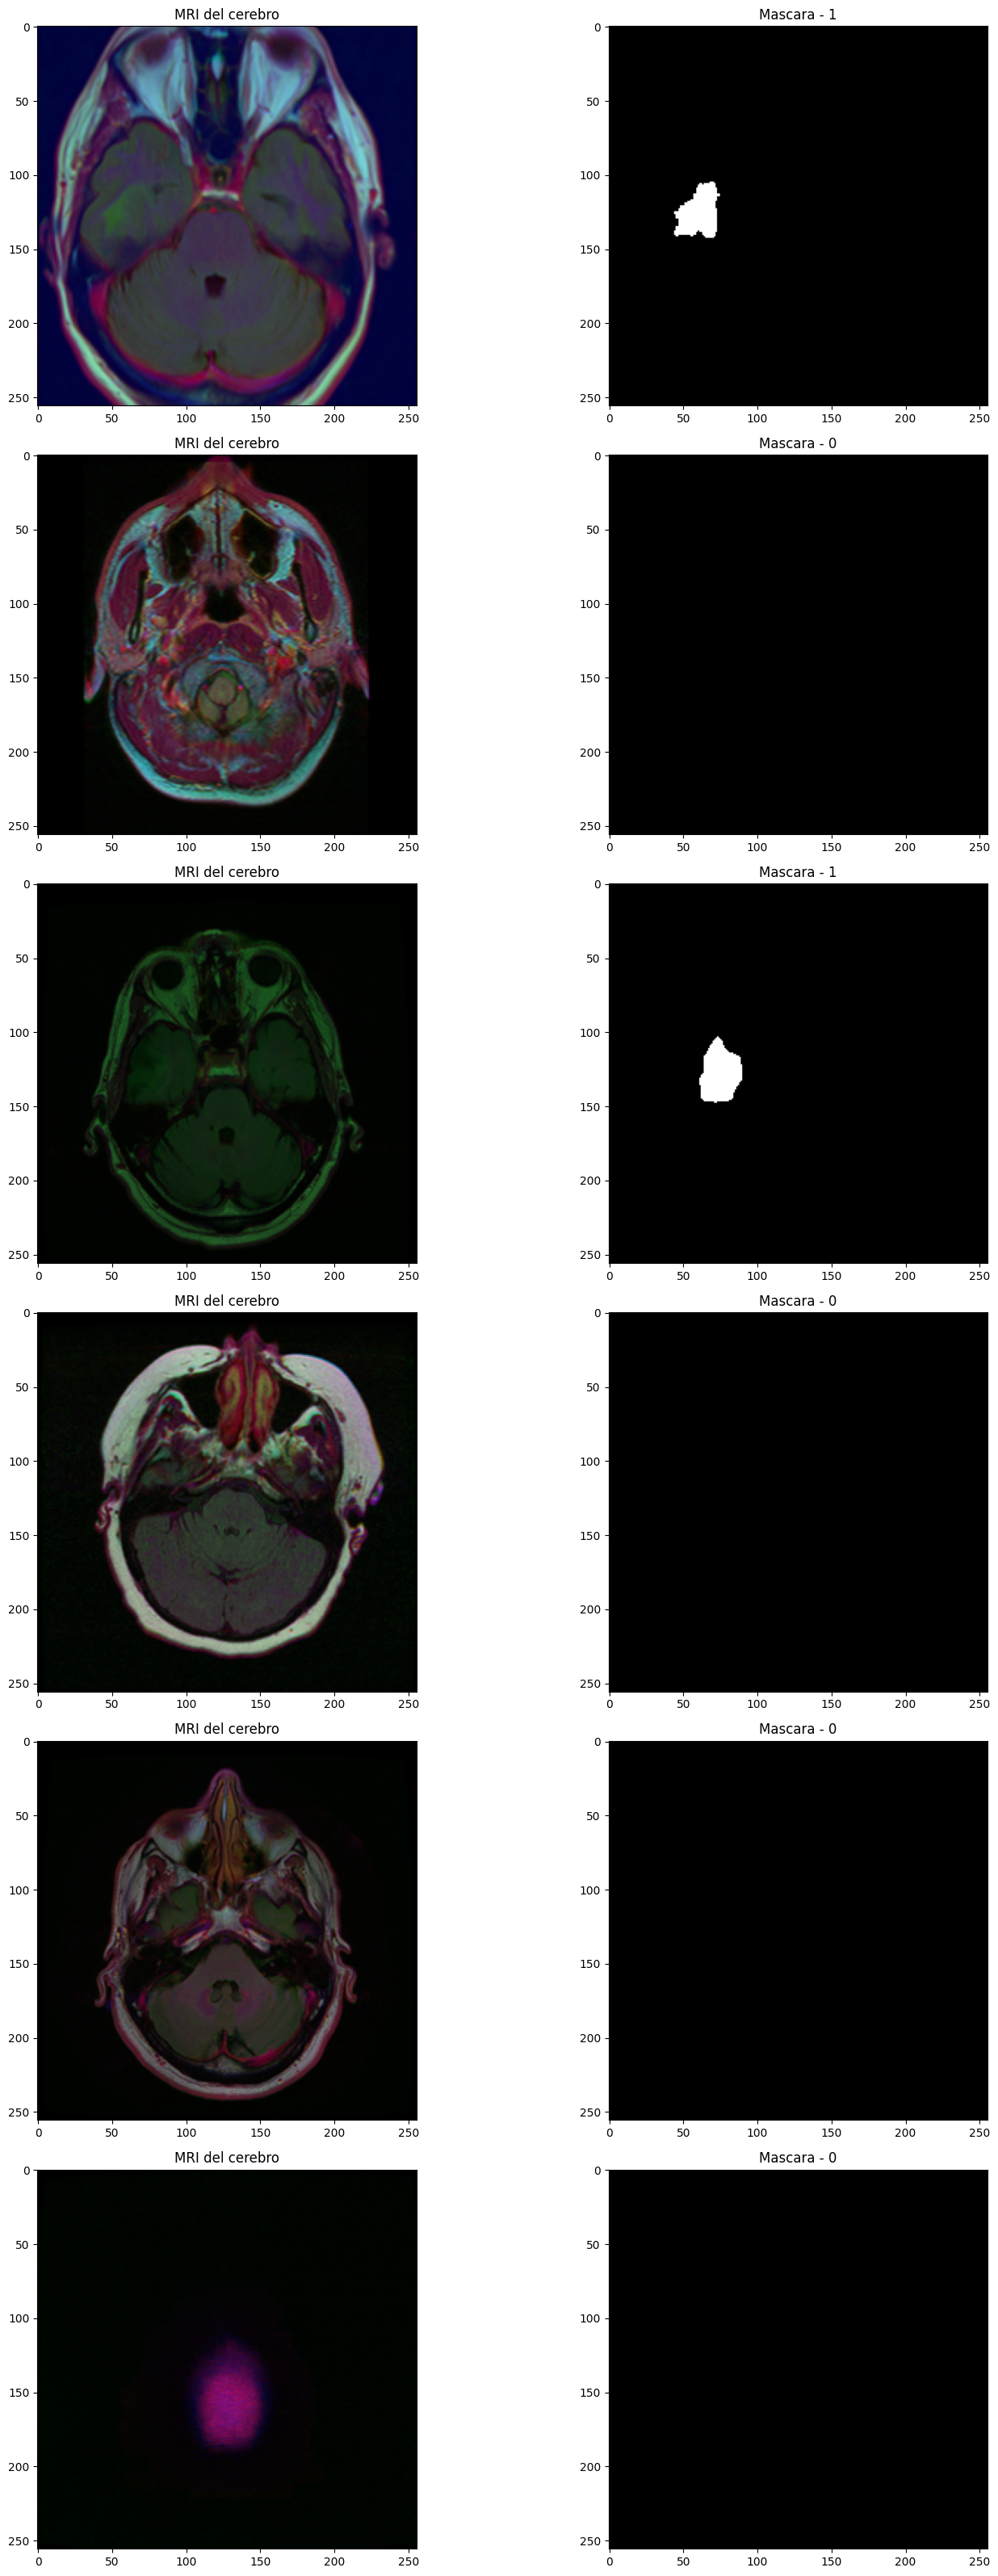

In [ ]:
#visualizacion basica visualizaremos imagenes (MRI y Mascaras) en el dataset de forma separada
import random
fig, axs = plt.subplots(6,2, figsize = (16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df))#seleccionamos in indice aleatorio
  axs[count] [0].title.set_text("MRI del cerebro")#configuramos el titulo
  axs[count] [0].imshow(cv2.imread(brain_df.image_path[i]))#mostramos la MRI
  axs[count] [1].title.set_text("Mascara - " + str(brain_df['mask'][i])) #Colocamos el titulo en la mascara (0 o 1)
  axs[count] [1].imshow(cv2.imread(brain_df.mask_path[i])) #mostramos la mascara correspondiente
  count += 1

fig.tight_layout()

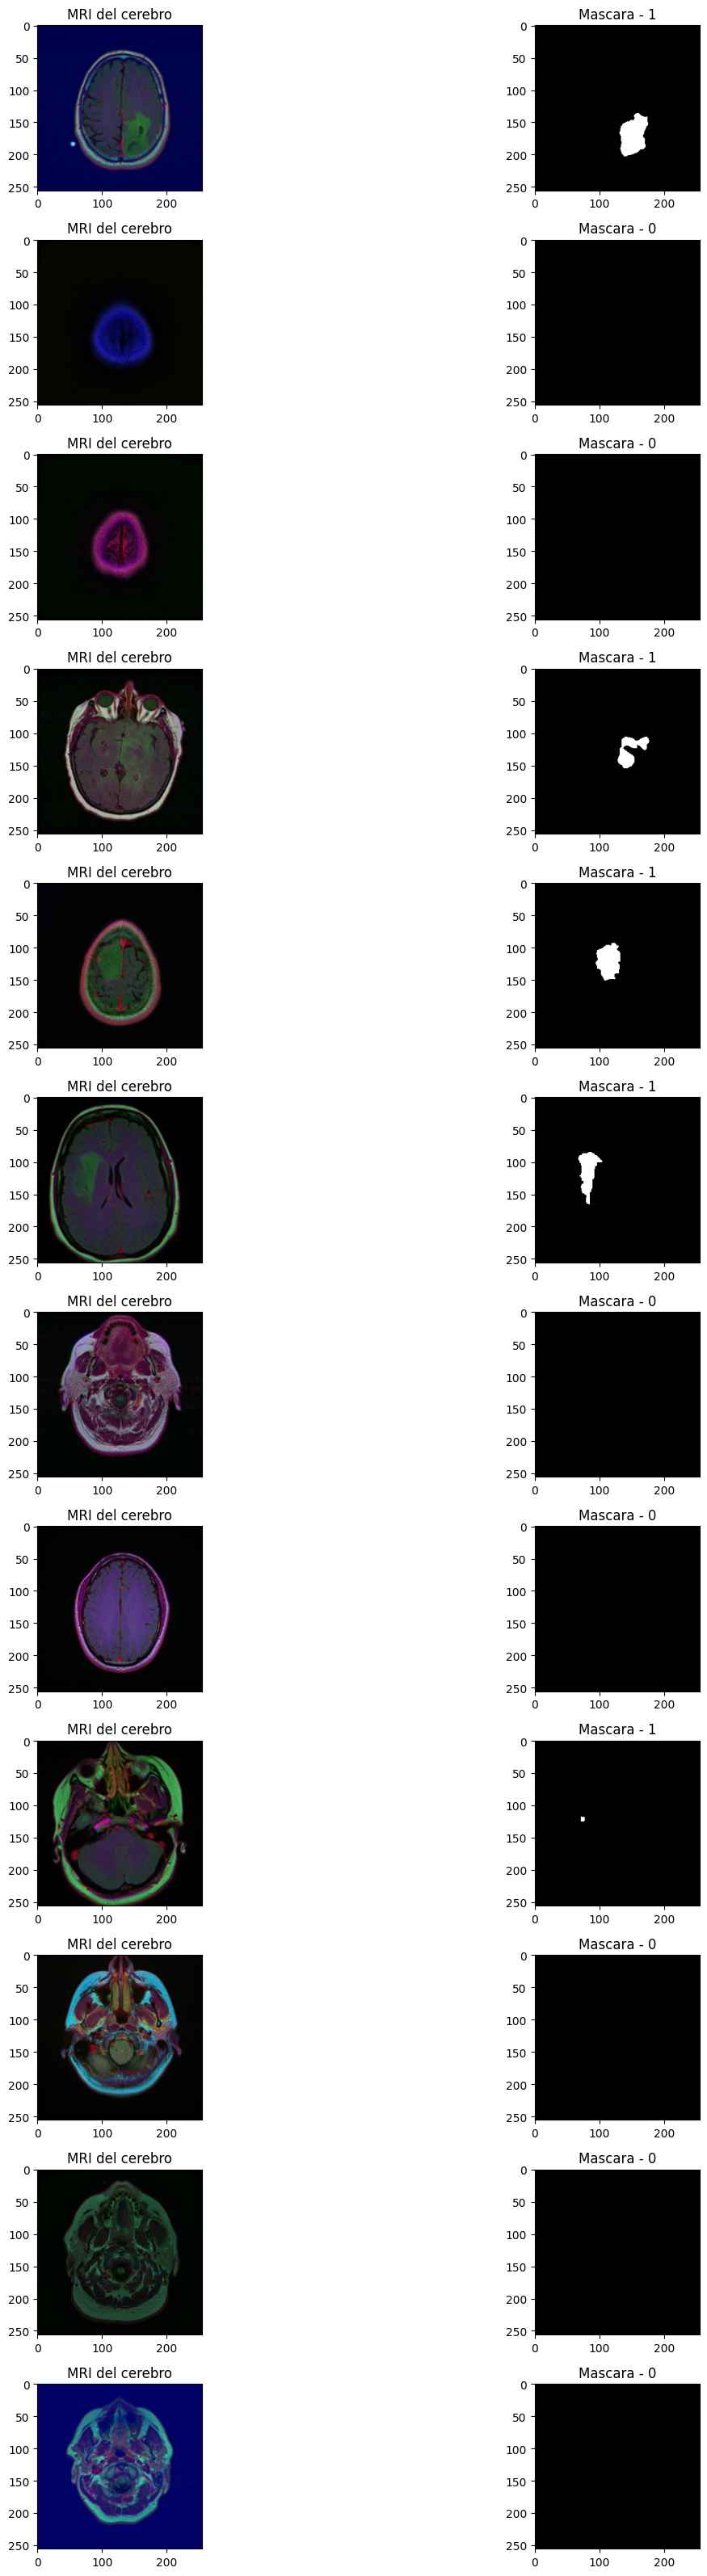

In [ ]:
#visualizacion basica visualizaremos imagenes (MRI y Mascaras) en el dataset de forma separada
import random
fig, axs = plt.subplots(12,2, figsize = (16,32))
count = 0
for x in range(12):
  i = random.randint(0, len(brain_df))#seleccionamos in indice aleatorio
  axs[count] [0].title.set_text("MRI del cerebro")#configuramos el titulo
  axs[count] [0].imshow(cv2.imread(brain_df.image_path[i]))#mostramos la MRI
  axs[count] [1].title.set_text("Mascara - " + str(brain_df['mask'][i])) #Colocamos el titulo en la mascara (0 o 1)
  axs[count] [1].imshow(cv2.imread(brain_df.mask_path[i])) #mostramos la mascara correspondiente
  count += 1

fig.tight_layout()

In [ ]:
brain_df_train = brain_df.drop(columns = ['patient_id'])

In [ ]:
brain_df_train.shape

(3929, 3)

In [ ]:
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x: str(x))

In [ ]:
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(brain_df_train, test_size = 0.15)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15)

In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="training",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="validation",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= './',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))

Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [ ]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))

In [ ]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
for layer in basemodel.layers:
  layers.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 20, epochs = 1, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

102/141 [====================>.........] - ETA: 11:20 - loss: 0.7643 - accuracy: 0.7203

KeyboardInterrupt: ignored

In [ ]:
model_json = model.to_json()
with open("classifier-resnet-model.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the AlexNet-like model
alexnet_model = Sequential()

# Layer 1
alexnet_model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2
alexnet_model.add(Conv2D(256, (5, 5), activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3
alexnet_model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 4
alexnet_model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 5
alexnet_model.add(Conv2D(256, (3, 3), activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten
alexnet_model.add(Flatten())

# Fully connected layers
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dense(1000, activation='softmax'))  # Assuming 1000 classes for ImageNet

# Compile the model
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 384)         1

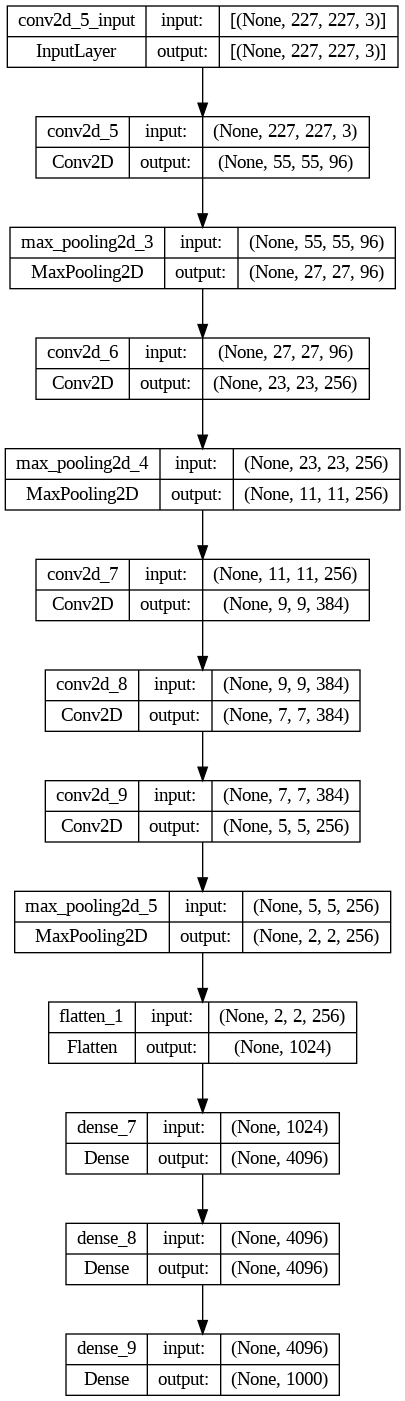

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model

# Define the AlexNet-like model
alexnet_model = Sequential()

# Layer 1
alexnet_model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2
alexnet_model.add(Conv2D(256, (5, 5), activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3
alexnet_model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 4
alexnet_model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 5
alexnet_model.add(Conv2D(256, (3, 3), activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten
alexnet_model.add(Flatten())

# Fully connected layers
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dense(1000, activation='softmax'))  # Assuming 1000 classes for ImageNet

# Compile the model
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Save the model architecture as an image file
plot_model(alexnet_model, to_file='alexnet_model.png', show_shapes=True, show_layer_names=True)

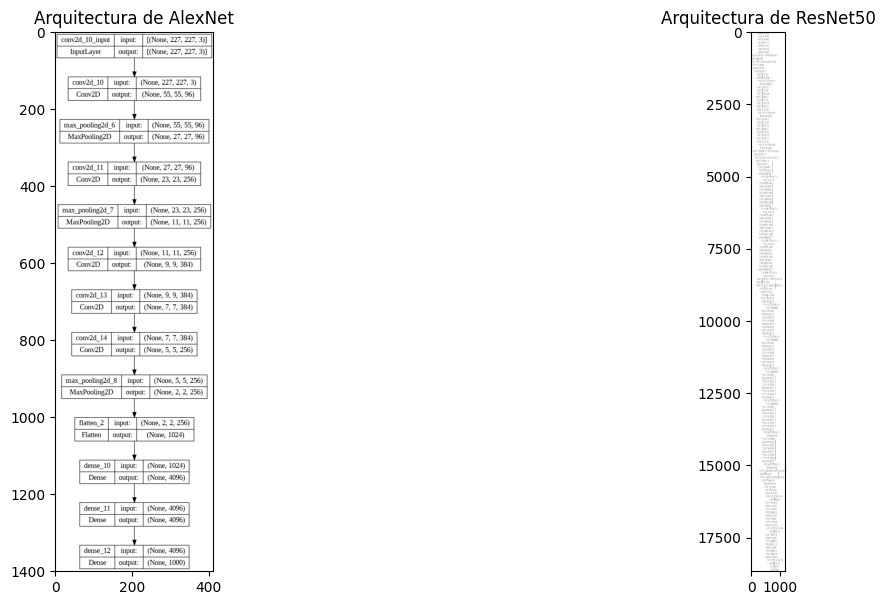

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.applications import ResNet50
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Función para crear y guardar la imagen de la arquitectura
def visualize_model(model, filename):
    plot_model(model, to_file=filename, show_shapes=True, show_layer_names=True)

# Crear modelo similar a AlexNet
alexnet_model = Sequential()

alexnet_model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

alexnet_model.add(Conv2D(256, (5, 5), activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

alexnet_model.add(Conv2D(384, (3, 3), activation='relu'))

alexnet_model.add(Conv2D(384, (3, 3), activation='relu'))

alexnet_model.add(Conv2D(256, (3, 3), activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

alexnet_model.add(Flatten())

alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dense(1000, activation='softmax'))

# Visualizar y guardar la arquitectura de AlexNet
visualize_model(alexnet_model, 'alexnet_model.png')

# Crear modelo base de ResNet50
input_tensor = Input(shape=(256, 256, 3))
basemodel_resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Agregar capas adicionales para clasificación
headmodel_resnet = basemodel_resnet.output
headmodel_resnet = Flatten(name='flatten')(headmodel_resnet)
headmodel_resnet = Dense(2, activation='softmax')(headmodel_resnet)

# Crear modelo completo de ResNet50
model_resnet = Model(inputs=basemodel_resnet.input, outputs=headmodel_resnet)

# Visualizar y guardar la arquitectura de ResNet50
visualize_model(model_resnet, 'resnet_model.png')

# Mostrar las imágenes de las arquitecturas
alexnet_img = plt.imread('alexnet_model.png')
resnet_img = plt.imread('resnet_model.png')

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(alexnet_img)
plt.title('Arquitectura de AlexNet')

plt.subplot(1, 2, 2)
plt.imshow(resnet_img)
plt.title('Arquitectura de ResNet50')

plt.show()

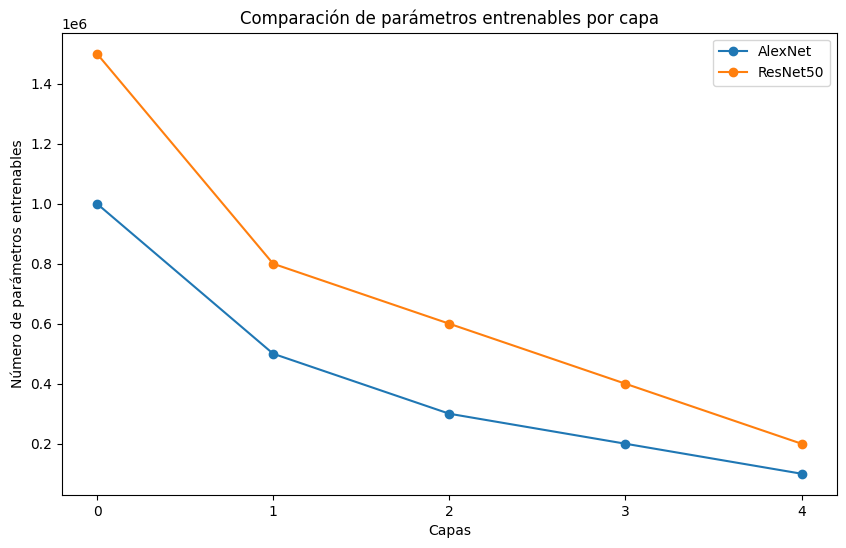

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Números ficticios para representar la cantidad de parámetros entrenables en cada capa
alexnet_params = [1000000, 500000, 300000, 200000, 100000]
resnet_params = [1500000, 800000, 600000, 400000, 200000]

# Crear índices para las capas
layers = np.arange(len(alexnet_params))

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar curvas para AlexNet y ResNet50
ax.plot(layers, alexnet_params, label='AlexNet', marker='o')
ax.plot(layers, resnet_params, label='ResNet50', marker='o')

# Añadir etiquetas y leyenda
ax.set_xlabel('Capas')
ax.set_ylabel('Número de parámetros entrenables')
ax.set_title('Comparación de parámetros entrenables por capa')
ax.set_xticks(layers)
ax.legend()
# Mostrar el gráfico
plt.show()

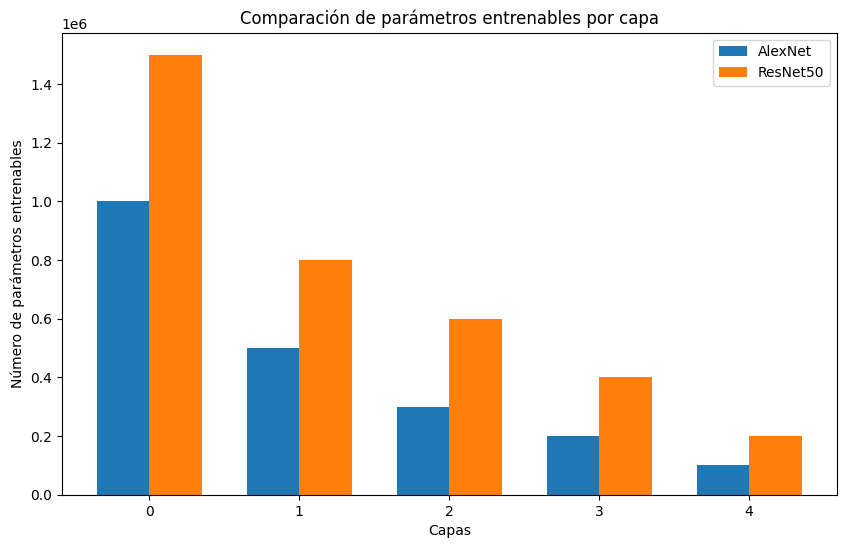

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Números ficticios para representar la cantidad de parámetros entrenables en cada capa
alexnet_params = [1000000, 500000, 300000, 200000, 100000]
resnet_params = [1500000, 800000, 600000, 400000, 200000]

# Crear índices para las capas
layers = np.arange(len(alexnet_params))

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar barras para AlexNet y ResNet50
bar_width = 0.35
ax.bar(layers - bar_width/2, alexnet_params, bar_width, label='AlexNet')
ax.bar(layers + bar_width/2, resnet_params, bar_width, label='ResNet50')

# Añadir etiquetas y leyenda
ax.set_xlabel('Capas')
ax.set_ylabel('Número de parámetros entrenables')
ax.set_title('Comparación de parámetros entrenables por capa')
ax.set_xticks(layers)
ax.legend()

# Mostrar el gráfico
plt.show()